In [36]:
from sklearn.linear_model import Ridge
import pandas as pd
from sklearn import linear_model
import numpy as np
import warnings

In [37]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = feature.apply(lambda x: x**power)
    return poly_dataframe

In [38]:
import matplotlib.pyplot as plt
%matplotlib inline

In [39]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
sales = pd.read_csv('../data/kc_house_data.csv', dtype=dtype_dict)

In [40]:
sales = sales.sort(['sqft_living','price'])

/home/chaitanya/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


Loading BokehJS ...

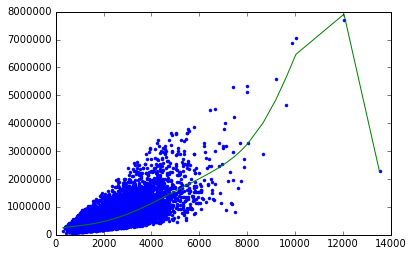

In [41]:
poly15_data = polynomial_dataframe(sales['sqft_living'], 15)
features = poly15_data.columns
poly15_data['price'] = sales['price']
l2_small_penalty = 1.5e-5

from sklearn import linear_model
import numpy as np

model15 = linear_model.Ridge(alpha=l2_small_penalty, normalize=True)
model15.fit(poly15_data[features], sales['price'])

from bokeh.plotting import figure, output_notebook, show
from bokeh.models import HoverTool, BoxSelectTool, BoxZoomTool, PanTool, ResizeTool, ResetTool
output_notebook()
TOOLS = [BoxSelectTool(), HoverTool(), BoxZoomTool(), PanTool(), ResizeTool(), ResetTool()]
p = figure(plot_width=400, plot_height=400, tools = TOOLS)
p.circle(poly15_data['power_1'], poly15_data['price'], line_width=2)
p.line(poly15_data['power_1'], model15.predict(poly15_data[features]), color="Red")
plt.plot(poly15_data['power_1'], poly15_data['price'],'.')#,
plt.plot(poly15_data['power_1'], model15.predict(poly15_data[features]),'-')
show(p)


In [42]:
model15.coef_[0]

124.8733064821575

In [43]:
set_1 = pd.read_csv('../data/wk3_kc_house_set_1_data.csv', dtype=dtype_dict)
set_2 = pd.read_csv('../data/wk3_kc_house_set_2_data.csv', dtype=dtype_dict)
set_3 = pd.read_csv('../data/wk3_kc_house_set_3_data.csv', dtype=dtype_dict)
set_4 = pd.read_csv('../data/wk3_kc_house_set_4_data.csv', dtype=dtype_dict)

def fit_15_deg_poly(X, y, alpha=1e-9):
    poly15_data = polynomial_dataframe(X, 15)
    model15 = linear_model.Ridge(alpha=alpha, normalize=True)
    return model15.fit(poly15_data, y)

def plot_fit(model, X, y):
    plt.plot(X['power_1'], y,'.',
    X['power_1'], model.predict(X[features]),'-')

In [44]:
model15_1 = fit_15_deg_poly(set_1['sqft_living'], set_1['price'])
model15_2 = fit_15_deg_poly(set_2['sqft_living'], set_2['price'])
model15_3 = fit_15_deg_poly(set_3['sqft_living'], set_3['price'])
model15_4 = fit_15_deg_poly(set_4['sqft_living'], set_4['price'])

print 'Coefficients for set1 fit: ', model15_1.coef_
print 'Coefficients for set2 fit: ', model15_2.coef_
print 'Coefficients for set3 fit: ', model15_3.coef_
print 'Coefficients for set4 fit: ', model15_4.coef_

Coefficients for set1 fit:  [  5.44669412e+02  -3.55447618e-01   1.22446388e-04  -1.17175329e-08
  -3.90512313e-13  -1.39076280e-17   1.47860291e-20   6.87491872e-25
  -7.57204149e-29  -1.04097296e-32  -3.71844037e-37   3.39989279e-41
   5.56591999e-45   2.53761348e-49  -3.35152889e-53]
Coefficients for set2 fit:  [  8.59362647e+02  -8.18118272e-01   4.28879980e-04  -9.12770658e-08
  -2.69604330e-12   3.73980265e-15  -1.42711813e-19  -6.30794752e-23
  -1.44559620e-27   7.44321289e-31   9.25866039e-35   3.27991695e-41
  -1.29543482e-42  -1.38781282e-46   1.66546455e-50]
Coefficients for set3 fit:  [ -7.55395924e+02   9.75579506e-01  -4.58945996e-04   7.77958126e-08
   7.15013274e-12  -2.88601978e-15  -2.13677773e-20   3.38085208e-23
   2.19178135e-27  -1.97067743e-31  -4.15993080e-35  -1.80196230e-39
   3.19071096e-43   5.08456976e-47  -3.93304273e-51]
Coefficients for set4 fit:  [  1.11944574e+03  -9.83760259e-01   3.38770931e-04   3.60377084e-08
  -4.37813997e-11   5.77191684e-15   7.

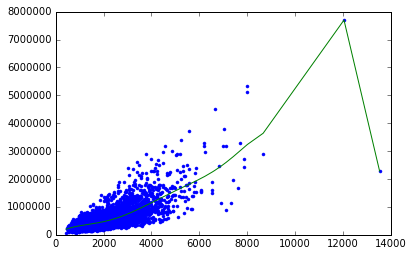

In [45]:
plot_fit(model15_1, polynomial_dataframe(set_1['sqft_living'], 15), set_1['price'])

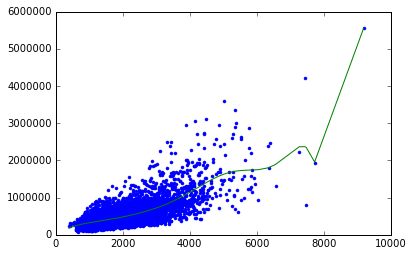

In [46]:
plot_fit(model15_2, polynomial_dataframe(set_2['sqft_living'], 15), set_2['price'])

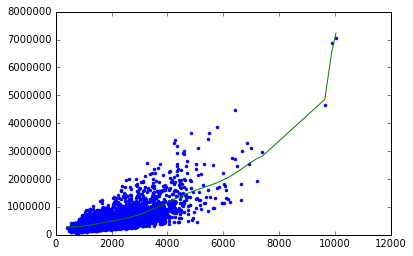

In [47]:
plot_fit(model15_3, polynomial_dataframe(set_3['sqft_living'], 15), set_3['price'])

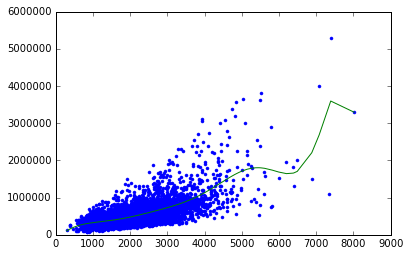

In [48]:
plot_fit(model15_4, polynomial_dataframe(set_4['sqft_living'], 15), set_4['price'])

In [49]:
print model15_1.coef_[0]
print model15_2.coef_[0]
print model15_3.coef_[0]
print model15_4.coef_[0]

544.669411504
859.362646996
-755.395924079
1119.44574309


In [50]:
l2_large_penalty=1.23e2
model15_1 = fit_15_deg_poly(set_1['sqft_living'], set_1['price'], l2_large_penalty)
model15_2 = fit_15_deg_poly(set_2['sqft_living'], set_2['price'], l2_large_penalty)
model15_3 = fit_15_deg_poly(set_3['sqft_living'], set_3['price'], l2_large_penalty)
model15_4 = fit_15_deg_poly(set_4['sqft_living'], set_4['price'], l2_large_penalty)

print 'Coefficients for set1 fit: ', model15_1.coef_
print 'Coefficients for set2 fit: ', model15_2.coef_
print 'Coefficients for set3 fit: ', model15_3.coef_
print 'Coefficients for set4 fit: ', model15_4.coef_

Coefficients for set1 fit:  [  2.32806803e+00   3.53621608e-04   3.31969692e-08   2.00082477e-12
   1.11492559e-16   6.57786122e-21   4.12939525e-25   2.70393755e-29
   1.81614763e-33   1.23824277e-37   8.51872481e-42   5.89455598e-46
   4.09542560e-50   2.85464889e-54   1.99547476e-58]
Coefficients for set2 fit:  [  2.09756903e+00   3.90817483e-04   6.67189944e-08   8.90002997e-12
   9.72639877e-16   9.69733682e-20   9.50564475e-24   9.44491031e-28
   9.57191338e-32   9.86945155e-36   1.03101115e-39   1.08729784e-43
   1.15453748e-47   1.23211305e-51   1.31986696e-55]
Coefficients for set3 fit:  [  2.28906258e+00   4.12472190e-04   6.08835345e-08   6.58572163e-12
   6.15278155e-16   5.64446634e-20   5.28834396e-24   5.07091402e-28
   4.94657273e-32   4.88043809e-36   4.85009106e-40   4.84161534e-44
   4.84635021e-48   4.85883628e-52   4.87558469e-56]
Coefficients for set4 fit:  [  2.08596194e+00   4.05035772e-04   7.46864647e-08   1.13096608e-11
   1.45864442e-15   1.73561251e-19   2.

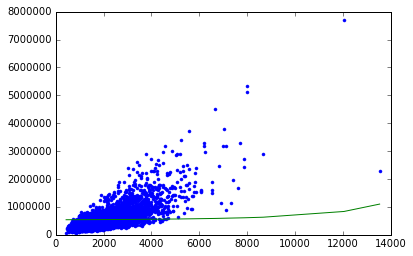

In [51]:
plot_fit(model15_1, polynomial_dataframe(set_1['sqft_living'], 15), set_1['price'])

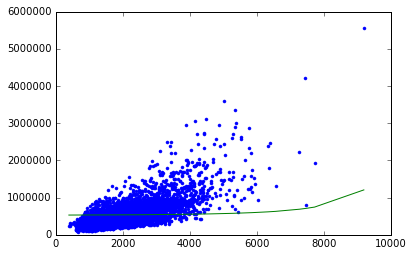

In [52]:
plot_fit(model15_2, polynomial_dataframe(set_2['sqft_living'], 15), set_2['price'])

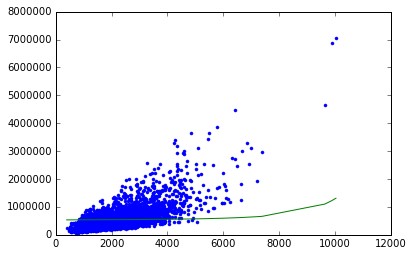

In [53]:
plot_fit(model15_3, polynomial_dataframe(set_3['sqft_living'], 15), set_3['price'])

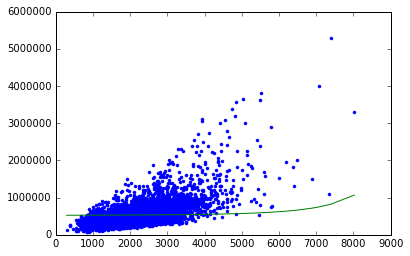

In [54]:
plot_fit(model15_4, polynomial_dataframe(set_4['sqft_living'], 15), set_4['price'])

In [55]:
print model15_1.coef_[0]
print model15_2.coef_[0]
print model15_3.coef_[0]
print model15_4.coef_[0]

2.32806802958
2.09756902778
2.28906258119
2.08596194092


In [57]:
train_valid_shuffled = pd.read_csv('../data/wk3_kc_house_train_valid_shuffled.csv', dtype=dtype_dict)
test = pd.read_csv('../data/wk3_kc_house_test_data.csv', dtype=dtype_dict)

In [58]:
n = len(train_valid_shuffled)
k = 10 # 10-fold cross-validation

for i in xrange(k):
    start = (n*i)/k
    end = (n*(i+1))/k-1
    print i, (start, end)

0 (0, 1938)
1 (1939, 3878)
2 (3879, 5817)
3 (5818, 7757)
4 (7758, 9697)
5 (9698, 11636)
6 (11637, 13576)
7 (13577, 15515)
8 (15516, 17455)
9 (17456, 19395)


In [59]:
train_valid_shuffled[0:10] # rows 0 to 9

id             date     price  bedrooms  bathrooms  sqft_living  \
0  2780400035  20140505T000000  665000.0       4.0       2.50       2800.0   
1  1703050500  20150321T000000  645000.0       3.0       2.50       2490.0   
2  5700002325  20140605T000000  640000.0       3.0       1.75       2340.0   
3  0475000510  20141118T000000  594000.0       3.0       1.00       1320.0   
4  0844001052  20150128T000000  365000.0       4.0       2.50       1904.0   
5  2781280290  20150427T000000  305000.0       3.0       2.50       1610.0   
6  2214800630  20141105T000000  239950.0       3.0       2.25       1560.0   
7  2114700540  20141021T000000  366000.0       3.0       2.50       1320.0   
8  2596400050  20140730T000000  375000.0       3.0       1.00       1960.0   
9  4140900050  20150126T000000  440000.0       4.0       1.75       2180.0   

   sqft_lot floors  waterfront  view     ...      grade  sqft_above  \
0      5900      1           0     0     ...          8        1660   
1      5978      2           0     0     ...          9        2490   
2      4206      1           0     0     ...          7        1170   
3      5000      1           0     0     ...          7        1090   
4      8200      2           0     0     ...          7        1904   
5      3516      2           0     0     ...          8        1610   
6      8280      2           0     0     ...          7        1560   
7      4320      1           0     0     ...          6         660   
8      7955      1           0     0     ...          7        1260   
9     10200      1           0     2     ...          8        2000   

   sqft_basement  yr_built  yr_renovated  zipcode      lat     long  \
0           1140      1963             0    98115  47.6809 -122.286   
1              0      2003             0    98074  47.6298 -122.022   
2           1170      1917             0    98144  47.5759 -122.288   
3            230      1920             0    98107  47.6674 -122.365   
4              0      1999             0    98010  47.3107 -122.001   
5              0      2006             0    98055  47.4491 -122.188   
6              0      1979             0    98001  47.3393 -122.259   
7            660      1918             0    98106  47.5327 -122.347   
8            700      1963             0    98177  47.7641 -122.364   
9            180      1966             0    98028  47.7638 -122.270   

   sqft_living15  sqft_lot15  
0         2580.0      5900.0  
1         2710.0      6629.0  
2         1360.0      4725.0  
3         1700.0      5000.0  
4         1560.0     12426.0  
5         1610.0      3056.0  
6         1920.0      8120.0  
7         1190.0      4200.0  
8         1850.0      8219.0  
9         2590.0     10445.0  

[10 rows x 21 columns]

In [60]:
i = 4
start = (n*i)/10
end = (n*(i+1))/10
validation4=train_valid_shuffled[start:end+1]

In [61]:
print int(round(validation4['price'].mean(), 0))

544615


In [62]:
n = len(train_valid_shuffled)
first_two = train_valid_shuffled[0:2]
last_two = train_valid_shuffled[n-2:n]
print first_two.append(last_two)

               id             date      price  bedrooms  bathrooms  \
0      2780400035  20140505T000000   665000.0       4.0       2.50   
1      1703050500  20150321T000000   645000.0       3.0       2.50   
19394  4139480190  20140916T000000  1153000.0       3.0       3.25   
19395  7237300290  20150326T000000   338000.0       5.0       2.50   

       sqft_living  sqft_lot floors  waterfront  view     ...      grade  \
0           2800.0      5900      1           0     0     ...          8   
1           2490.0      5978      2           0     0     ...          9   
19394       3780.0     10623      1           0     1     ...         11   
19395       2400.0      4496      2           0     0     ...          7   

       sqft_above  sqft_basement  yr_built  yr_renovated  zipcode      lat  \
0            1660           1140      1963             0    98115  47.6809   
1            2490              0      2003             0    98074  47.6298   
19394        2650           1130  

In [66]:
print int(round(validation4['price'].mean(), 0))

544615


In [67]:
def k_fold_cross_validation(k, l2_penalty, data, output):
    errors = []
    for i in range(0, k):
        start = (n*i)/10
        end = (n*(i+1))/10
        validation_X=data[start:end+1]
        validation_y=output[start:end+1]
        train_X=data[0:start].append(data[end+1:n])
        train_y=output[0:start].append(output[end+1:n])
        model = fit_15_deg_poly(train_X, train_y, l2_penalty)
        errors.append(((model.predict(polynomial_dataframe(validation_X, 15)) - validation_y) ** 2).sum())
    return np.mean(errors)

In [68]:
l2_penalties = np.logspace(3, 9, num=13)
l2_error_map = {}
for i in l2_penalties:
    l2_error_map[str(i)] = k_fold_cross_validation(10, i, train_valid_shuffled['sqft_living'], train_valid_shuffled['price'])

In [69]:
d=l2_error_map
for w in sorted(d, key=d.get):
    print w, d[w]

1000.0 2.65017874562e+14
3162.27766017 2.6573349394e+14
10000.0 2.65964941178e+14
31622.7766017 2.66038658207e+14
100000.0 2.66062022668e+14
316227.766017 2.6606941648e+14
1000000.0 2.66071755142e+14
3162277.66017 2.66072494744e+14
10000000.0 2.66072728633e+14
31622776.6017 2.66072802595e+14
100000000.0 2.66072825984e+14
316227766.017 2.66072833381e+14
1000000000.0 2.6607283572e+14


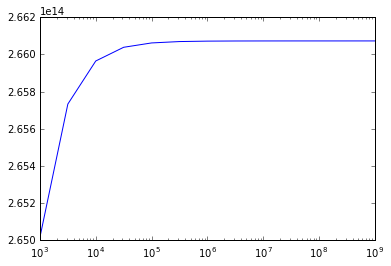

In [70]:
# Plot the l2_penalty values in the x axis and the cross-validation error in the y axis.
# Using plt.xscale('log') will make your plot more intuitive.
x = sorted([float(x) for x in l2_error_map.keys()])
y = [l2_error_map[str(i)] for i in x]
plt.xscale('log')
plt.plot(x, y)

In [71]:
l2_error_map.values()

[266072833380598.25,
 266069416480160.81,
 266071755141529.06,
 266072802595272.56,
 266072835719505.69,
 265017874561645.25,
 266072825984325.09,
 266038658206891.56,
 265964941178385.16,
 266072728632762.69,
 266072494744454.81,
 265733493939507.75,
 266062022667575.0]

In [72]:
l2_penalties

array([  1.00000000e+03,   3.16227766e+03,   1.00000000e+04,
         3.16227766e+04,   1.00000000e+05,   3.16227766e+05,
         1.00000000e+06,   3.16227766e+06,   1.00000000e+07,
         3.16227766e+07,   1.00000000e+08,   3.16227766e+08,
         1.00000000e+09])

In [73]:
best_l2 = 1000
best_model = fit_15_deg_poly(train_valid_shuffled['sqft_living'], train_valid_shuffled['price'], best_l2)

In [74]:
print '%.e' % ((best_model.predict(polynomial_dataframe(test['sqft_living'], 15)) - test['price']) ** 2).sum()

3e+14
